In [ ]:
import pickle
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/University/ProjetML/')
os.chdir('Data/Donnees_ENT/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load in data with 80:20 split for training:test
with open('Final_Data_sets80.pickle', "rb") as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

In [ ]:
# convert (498700, 32) to (498700, 32, 1) so fits in Conv1D input layer
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## CNN Architectures

1D CNN are often use for sensor data, or for time series data. 
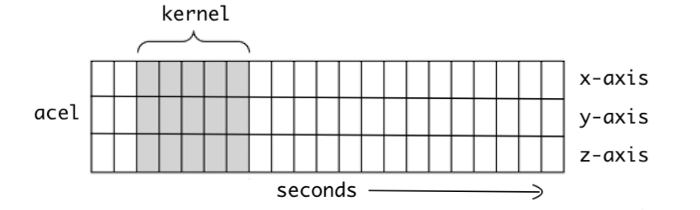

![A 1D Global max pooling](https://peltarion.com/static/1d_global_max_pooling.png) A 1D Global max pooling

The difference here versus the previous models which consisted only of Dense layers is the presence of convolution layers for which this type of network is named. A convolution layer passes over one set of values to the next calculating a dot product as it goes, creating one value from multiple values. We can determine the quantity of kernels (the functions that iterate over the array to calculate the dot product) as well as the size of its window it uses to calculate the dot product, and the size of its stride. As it creates a new value from multiple, we would lose dimensionality each time we have a Conv layer so we use padding. 

After the first Conv1D we add a pooling layer. This is to reduce the spatial size of the convolved features and also helps reduce overfitting which is a probelm with CNNs.Here we use max pooling instead of average pooling because taking the maximum instead of the average value from our kernel reduces noise by discarding noisy activations and so is better than average pooling.

### Basic Convolutional Neural Network

In [ ]:
# Basic CNN
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(32,1)))
model.add(Flatten())
model.add(Dense(5, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_69 (Conv1D)           (None, 31, 64)            192       
_________________________________________________________________
flatten_6 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 5)                 9925      
Total params: 10,117
Trainable params: 10,117
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
optimizer = "adam",
metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=32,epochs=30, verbose=2, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping('loss', patience=3)])
acc = model.evaluate(x_test, y_test)
print("Loss:", acc[0], " Accuracy:", acc[1])

Epoch 1/30
12468/12468 - 44s - loss: 0.2602 - accuracy: 0.9065 - val_loss: 0.4388 - val_accuracy: 0.8419
Epoch 2/30
12468/12468 - 44s - loss: 0.2596 - accuracy: 0.9064 - val_loss: 0.3199 - val_accuracy: 0.8983
Epoch 3/30
12468/12468 - 45s - loss: 0.2592 - accuracy: 0.9069 - val_loss: 0.4657 - val_accuracy: 0.8281
Epoch 4/30
12468/12468 - 44s - loss: 0.2582 - accuracy: 0.9075 - val_loss: 0.5101 - val_accuracy: 0.8149
Epoch 5/30
12468/12468 - 44s - loss: 0.2578 - accuracy: 0.9074 - val_loss: 0.4511 - val_accuracy: 0.8448
Epoch 6/30
12468/12468 - 46s - loss: 0.2562 - accuracy: 0.9075 - val_loss: 0.4868 - val_accuracy: 0.8307
Epoch 7/30
12468/12468 - 45s - loss: 0.2571 - accuracy: 0.9077 - val_loss: 0.4163 - val_accuracy: 0.8631
Epoch 8/30
12468/12468 - 45s - loss: 0.2565 - accuracy: 0.9081 - val_loss: 0.3188 - val_accuracy: 0.8960
Epoch 9/30
12468/12468 - 44s - loss: 0.2550 - accuracy: 0.9083 - val_loss: 0.3496 - val_accuracy: 0.8855
Epoch 10/30
12468/12468 - 44s - loss: 0.2556 - accuracy

## Intermediate Convolutional Neural Network

In [ ]:
model = Sequential()
model.add(Conv1D(28, 2, activation="relu", input_shape=(32,1)))
model.add(Conv1D(28, 2, activation="relu"))
model.add(MaxPooling1D(2))

model.add(Conv1D(64, 2, activation="relu"))
model.add(Conv1D(64, 2,activation="relu"))
model.add(MaxPooling1D(2))


model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
optimizer = "adam",
metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size=32,epochs=30, verbose=2, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping('loss', patience=3)])

Epoch 1/30
12468/12468 - 45s - loss: 0.3953 - accuracy: 0.8625 - val_loss: 0.5836 - val_accuracy: 0.8055
Epoch 2/30
12468/12468 - 45s - loss: 0.3399 - accuracy: 0.8789 - val_loss: 0.4322 - val_accuracy: 0.8588
Epoch 3/30
12468/12468 - 48s - loss: 0.3204 - accuracy: 0.8857 - val_loss: 0.3981 - val_accuracy: 0.8706
Epoch 4/30
12468/12468 - 45s - loss: 0.3092 - accuracy: 0.8898 - val_loss: 0.3501 - val_accuracy: 0.8727
Epoch 5/30
12468/12468 - 45s - loss: 0.3011 - accuracy: 0.8924 - val_loss: 0.4589 - val_accuracy: 0.8500
Epoch 6/30
12468/12468 - 45s - loss: 0.2950 - accuracy: 0.8943 - val_loss: 0.5422 - val_accuracy: 0.7972
Epoch 7/30
12468/12468 - 47s - loss: 0.2918 - accuracy: 0.8956 - val_loss: 0.5803 - val_accuracy: 0.7993
Epoch 8/30
12468/12468 - 45s - loss: 0.2884 - accuracy: 0.8968 - val_loss: 0.2744 - val_accuracy: 0.9124
Epoch 9/30
12468/12468 - 46s - loss: 0.2845 - accuracy: 0.8978 - val_loss: 0.3422 - val_accuracy: 0.8835
Epoch 10/30
12468/12468 - 47s - loss: 0.2836 - accuracy

In [ ]:
  acc = model.evaluate(x_test, y_test)
  print("Loss:", acc[0], " Accuracy:", acc[1])

3336/3336 [==============================] - 7s 2ms/step - loss: 0.3265 - accuracy: 0.8874
Loss: 0.32654300332069397  Accuracy: 0.8874179124832153


Principles of CNN Design:
- by convention channel size stays the same throughout network
- number of filters should start low and increase throughout the network
- keep adding layers until we over-fit then regularize using l1/l2 regularisation, droput, batch norm
- be inspired by patterns in classic networks such as Conv-Pool-Conv-Pool or Conv-Conv-Pool

In [ ]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='accuracy', patience=1)]

In [ ]:
model.fit(x_train, y_train, batch_size=32,epochs=50, verbose=2, callbacks=callbacks_list, validation_split=0.2)
acc = model.evaluate(x_test, y_test)
print("Loss:", acc[0], " Accuracy:", acc[1])

Epoch 1/50
12468/12468 - 76s - loss: 0.6468 - accuracy: 0.7868 - val_loss: 1.0875 - val_accuracy: 0.6388
Epoch 2/50
12468/12468 - 75s - loss: 0.5467 - accuracy: 0.8131 - val_loss: 0.9476 - val_accuracy: 0.6218
Epoch 3/50
12468/12468 - 73s - loss: 0.5072 - accuracy: 0.8234 - val_loss: 0.7243 - val_accuracy: 0.7591
Epoch 4/50
12468/12468 - 73s - loss: 0.4831 - accuracy: 0.8310 - val_loss: 0.6739 - val_accuracy: 0.7576
Epoch 5/50
12468/12468 - 71s - loss: 0.4592 - accuracy: 0.8397 - val_loss: 0.7894 - val_accuracy: 0.7042
Epoch 6/50
12468/12468 - 71s - loss: 0.4422 - accuracy: 0.8469 - val_loss: 0.5264 - val_accuracy: 0.8227
Epoch 7/50
12468/12468 - 71s - loss: 0.4280 - accuracy: 0.8519 - val_loss: 0.4253 - val_accuracy: 0.8596
Epoch 8/50
12468/12468 - 71s - loss: 0.4155 - accuracy: 0.8565 - val_loss: 0.4739 - val_accuracy: 0.8465
Epoch 9/50
12468/12468 - 71s - loss: 0.4066 - accuracy: 0.8608 - val_loss: 0.4494 - val_accuracy: 0.8576
Epoch 10/50
12468/12468 - 71s - loss: 0.3984 - accuracy

In [ ]:
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(hp.Int('n_filt_1', 4, 32, 4), 2, activation="relu", input_shape=(32,1)))
    model.add(Conv1D(hp.Int('n_filt_1', 4, 32, 4), 2, activation="relu"))
    model.add(MaxPooling1D())

    for i in range(hp.Int('n_layers', 1, 12)):
        filt_nb = hp.Int(f'conv_{i}_units', min_value=4, max_value=32, step=4)
        model.add(Conv1D(filt_nb, hp.Int(f'kernal_{i}_size', 1, 4), activation="relu"))
        model.add(Conv1D(filt_nb, hp.Int(f'kernal_{i}_size', 1, 4), activation="relu"))
    model.add(MaxPooling1D())


    model.add(Flatten())
    model.add(BatchNormalization())

    model.add(Dense(6, activation = 'softmax'))

    adam=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))
    model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = adam,
                metrics = ['accuracy'])
    return model

from kerastuner import Hyperband
tuner = Hyperband(build_model, max_epochs=150, objective="val_accuracy",project_name="cnn", executions_per_trial=2)
# Display search space summary
tuner.search_space_summary()


tuner.search(x=x_train,y=y_train, validation_data=(x_test,y_test), callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)] )
tuner.results_summary()

tuner.get_best_hyperparameters(num_trials=1)


## Auto-Optimised Models

Here, before attempting to use more appropriate CNN and RNNs, we are going to attempt one last time to get the best performance using only dense/fully-connected layers, by using the keras-tuner package to tune the hyperparameters of our model. Usually in machine learning we manually change each of these through trial and error, but with this package we can automate the combinatory process of optimising each hyperparameter. Here we have decided to auto-optimise the hyperperameters controlling the number of hidden layers, and the nb of neurons in each of those hidden layers

In [ ]:
!pip install keras-tuner
from kerastuner import RandomSearch

In [ ]:
def build_model(hp):
  d1 = hp.Int("d1_units", min_value=6, max_value=256, step=16)

  model = keras.models.Sequential()
  model.add(tf.keras.layers.Dense(d1, activation='relu', input_dim=32))

  for i in range(hp.Int('n_layers', 1, 8)):  # adding variation of layers.
        model.add(Dense(hp.Int(f'conv_{i}_units',
                                min_value=6,
                                max_value=256,
                                step=16), activation='relu'))
        
  
  model.add(Dense(6, activation='softmax'))
  
  model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
  return model

In [ ]:
tuner = RandomSearch(build_model, objective="val_accuracy", max_trials=5,executions_per_trial=5)
tuner.search(x=x_train,y=y_train,epochs=15,validation_data=(x_test,y_test))

Trial 5 Complete [00h 50m 10s]
val_accuracy: 0.917763352394104

Best val_accuracy So Far: 0.9192193508148193
Total elapsed time: 04h 20m 50s
INFO:tensorflow:Oracle triggered exit


### Construire le Modele

In [ ]:
model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(4,1)))
model.add(Conv1D(64, 2, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

In [ ]:
model.fit(xtrain, ytrain, batch_size=16,epochs=100, verbose=2, validation_split=0.2)

Epoch 1/100
7/7 - 0s - loss: 1.0363 - accuracy: 0.3465 - val_loss: 0.9948 - val_accuracy: 0.2692
Epoch 2/100
7/7 - 0s - loss: 0.9452 - accuracy: 0.3465 - val_loss: 0.9041 - val_accuracy: 0.5769
Epoch 3/100
7/7 - 0s - loss: 0.8996 - accuracy: 0.6238 - val_loss: 0.8725 - val_accuracy: 0.3846
Epoch 4/100
7/7 - 0s - loss: 0.8596 - accuracy: 0.6337 - val_loss: 0.8560 - val_accuracy: 0.4231
Epoch 5/100
7/7 - 0s - loss: 0.8324 - accuracy: 0.6436 - val_loss: 0.8400 - val_accuracy: 0.4231
Epoch 6/100
7/7 - 0s - loss: 0.8110 - accuracy: 0.6337 - val_loss: 0.7942 - val_accuracy: 0.5385
Epoch 7/100
7/7 - 0s - loss: 0.7920 - accuracy: 0.7525 - val_loss: 0.8010 - val_accuracy: 0.5000
Epoch 8/100
7/7 - 0s - loss: 0.7828 - accuracy: 0.6832 - val_loss: 0.8196 - val_accuracy: 0.5000
Epoch 9/100
7/7 - 0s - loss: 0.7653 - accuracy: 0.7624 - val_loss: 0.7344 - val_accuracy: 0.9231
Epoch 10/100
7/7 - 0s - loss: 0.7511 - accuracy: 0.9208 - val_loss: 0.7240 - val_accuracy: 0.8077
Epoch 11/100
7/7 - 0s - loss: